In [1]:
import pandas as pd
import numpy as np
from constants_grav import hc, Gentc2, letr
from def_potenciales import f
import plots_jordi as pts

In [12]:
MU = []; MU2 = []
DMU = []
AD = []
NCOR = []
from def_potenciales import multistate
for state in (210, 200, 320):
    tup = multistate(state).nsols
    dirfits = '/home/jordi/The_universal_rotation_curve_of_dwarf_disk_galaxies/Fitssolj%d/'%state
    print('--------------dwarf_disk_galaxies---------------------')
    print('------------------%d--------------------------------'%state)
    print('name \t rChi \t AIC \t BIC \t mu \t mu- \t mu+ \t rlam \t M_d')
    for nsol in tup:
        ID = 'multi_j_nsol%d'%nsol
        stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
        statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))#
        #print(statp.head())
        mu = statp['value'][3]*hc*1e24
        dmu = statp['stderr'][3]*hc*1e24
        Md = statp['value'][1]*1e3
        rlam = statp['value'][4]*1e3
        ad = statp['value'][2]
        mu2 = 1./statp['value'][3]
        MU.append(mu)
        MU2.append(mu2)
        DMU.append(dmu)
        NCOR.append(nsol)
        AD.append(ad)
        print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.3f \t %.2f'%(nsol, 
            stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, mu - dmu,  mu + dmu, rlam, Md))

--------------dwarf_disk_galaxies---------------------
------------------210--------------------------------
name 	 rChi 	 AIC 	 BIC 	 mu 	 mu- 	 mu+ 	 rlam 	 M_d
12 	 1.7 	 10.1 	 12.0 	 15.2 	 14.5 	 15.9 	 0.203 	 12.04
13 	 1.7 	 10.2 	 12.1 	 15.5 	 14.8 	 16.2 	 0.198 	 12.03
14 	 1.7 	 10.2 	 12.1 	 15.7 	 15.0 	 16.4 	 0.193 	 12.03
15 	 1.7 	 10.2 	 12.1 	 16.0 	 15.3 	 16.7 	 0.189 	 12.04
16 	 1.7 	 10.1 	 12.0 	 16.3 	 15.5 	 17.0 	 0.185 	 12.04
17 	 1.7 	 10.1 	 12.0 	 16.6 	 15.8 	 17.3 	 0.181 	 12.03
18 	 1.7 	 10.0 	 12.0 	 16.9 	 16.1 	 17.6 	 0.177 	 12.04
20 	 1.7 	 10.0 	 11.9 	 17.4 	 16.6 	 18.2 	 0.170 	 11.99
25 	 1.7 	 9.7 	 11.6 	 18.8 	 18.0 	 19.7 	 0.156 	 11.95
30 	 1.6 	 9.4 	 11.3 	 20.2 	 19.3 	 21.1 	 0.144 	 11.84
40 	 1.6 	 8.9 	 10.8 	 22.6 	 21.6 	 23.7 	 0.126 	 11.68
45 	 1.5 	 8.7 	 10.6 	 23.6 	 22.5 	 24.7 	 0.119 	 11.67
50 	 1.5 	 8.5 	 10.4 	 24.6 	 23.4 	 25.8 	 0.112 	 11.59
55 	 1.5 	 8.2 	 10.2 	 25.5 	 24.3 	 26.7 	 0.106 	 11.54
60 

In [13]:
###############################################################################################################
###############################################################################################################
for nbin in range(1,5,1):
    for state in (210, 200, 320):
        tup = multistate(state).nsols      
        dirfits = '/home/jordi/LSB_galaxies/URC/Fitssolj%d/bin%d/'%(state, nbin)
        print('------------------LSB galaxies------------------------')
        print('------------------ bin %d------------------------------'%nbin)
        print('------------------%d------------------------'%state)
        print('N_T \t rChi \t AIC \t BIC \t mu \t mu- \t mu+ \t rlam \t M_d')
        for nsol in tup:
#        for nsol in (12, 13, 14, 15, 16, 17, 18, 20, 25, 30, 40, 45, 50, 55, 60, 65, 70,75, 80, 85, 90,95,100):
            ID = 'MCMC_vbin%d_nsol%d'%(nbin,nsol)
            stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
            statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
            #print(statp.head())
            mu = statp['value'][2]*hc*1e24
            mu2 = 1./statp['value'][2]
            dmu = statp['stderr'][2]*hc*1e24
            Md = statp['value'][0]*1e3
            rlam = statp['value'][3]*1e3
            ad =  statp['value'][1]
            MU.append(mu)
            MU2.append(mu2*1e3)
            DMU.append(dmu)
            NCOR.append(nsol)
            AD.append(ad)
            print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.3f \t %.1f'%(nsol,  
                stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, mu - dmu,  mu + dmu,rlam, Md))

------------------LSB galaxies------------------------
------------------ bin 1------------------------------
------------------210------------------------
N_T 	 rChi 	 AIC 	 BIC 	 mu 	 mu- 	 mu+ 	 rlam 	 M_d
12 	 1.4 	 6.2 	 7.6 	 6.6 	 5.8 	 7.3 	 0.227 	 61.3
13 	 1.4 	 6.3 	 7.7 	 6.7 	 5.9 	 7.5 	 0.221 	 61.8
14 	 1.4 	 6.2 	 7.7 	 6.8 	 6.0 	 7.6 	 0.216 	 61.5
15 	 1.4 	 6.3 	 7.8 	 6.9 	 6.1 	 7.7 	 0.211 	 62.0
16 	 1.4 	 6.2 	 7.7 	 7.1 	 6.3 	 7.9 	 0.207 	 61.5
17 	 1.4 	 6.2 	 7.7 	 7.2 	 6.4 	 8.0 	 0.202 	 61.4
18 	 1.4 	 6.2 	 7.7 	 7.3 	 6.4 	 8.2 	 0.198 	 61.5
20 	 1.4 	 6.2 	 7.7 	 7.5 	 6.7 	 8.4 	 0.191 	 61.1
25 	 1.4 	 6.2 	 7.6 	 8.2 	 7.2 	 9.1 	 0.175 	 60.7
30 	 1.3 	 6.1 	 7.6 	 8.8 	 7.7 	 9.8 	 0.161 	 60.7
40 	 1.3 	 6.0 	 7.5 	 9.8 	 8.6 	 11.0 	 0.141 	 60.0
45 	 1.3 	 6.0 	 7.5 	 10.2 	 9.0 	 11.5 	 0.133 	 60.0
50 	 1.3 	 5.9 	 7.4 	 10.7 	 9.4 	 12.0 	 0.126 	 59.6
55 	 1.3 	 5.9 	 7.3 	 11.1 	 9.7 	 12.4 	 0.119 	 59.3
60 	 1.3 	 5.9 	 7.4 	 11.4 

18 	 5.0 	 16.8 	 17.4 	 0.6 	 0.2 	 1.0 	 0.465 	 4469.4
20 	 4.9 	 16.7 	 17.3 	 0.6 	 0.2 	 1.0 	 0.465 	 4473.9
25 	 5.0 	 16.8 	 17.4 	 0.7 	 0.3 	 1.1 	 0.400 	 4459.4
30 	 5.0 	 16.8 	 17.4 	 0.7 	 0.3 	 1.2 	 0.379 	 4464.3
40 	 5.0 	 16.8 	 17.4 	 0.9 	 0.3 	 1.4 	 0.322 	 4466.1
45 	 5.0 	 16.8 	 17.4 	 0.8 	 0.4 	 1.3 	 0.315 	 4475.7
50 	 5.0 	 16.8 	 17.4 	 1.0 	 0.4 	 1.5 	 0.283 	 4464.1
55 	 5.0 	 16.8 	 17.4 	 0.9 	 0.4 	 1.4 	 0.276 	 4463.8
60 	 5.0 	 16.8 	 17.4 	 1.0 	 0.4 	 1.5 	 0.259 	 4468.9
65 	 5.0 	 16.8 	 17.3 	 0.9 	 0.3 	 1.4 	 0.262 	 4483.5
70 	 5.0 	 16.8 	 17.4 	 0.9 	 0.3 	 1.6 	 0.243 	 4475.6
75 	 4.9 	 16.7 	 17.3 	 0.9 	 0.4 	 1.4 	 0.244 	 4484.4
80 	 5.0 	 16.8 	 17.4 	 1.0 	 0.4 	 1.6 	 0.218 	 4472.8
85 	 4.9 	 16.7 	 17.3 	 0.9 	 0.3 	 1.5 	 0.222 	 4469.8
90 	 5.0 	 16.8 	 17.4 	 1.0 	 0.4 	 1.6 	 0.200 	 4464.7
95 	 4.9 	 16.7 	 17.3 	 0.8 	 0.2 	 1.4 	 0.208 	 4469.0
100 	 5.0 	 16.8 	 17.3 	 0.9 	 0.3 	 1.5 	 0.192 	 4474.7
-------------

In [14]:
nbin = 5

for state in (210, 200, 320):
    tup = multistate(state).nsols
    dirfits = '/home/jordi/LSB_galaxies/URC/Fitssolj%d/bin%d/'%(state,nbin)
    print('------------------LSB galaxies------------------------')
    print('------------------ bin %d------------------------------'%nbin)
    print('------------------  mix %d  ------------------------'%state)
    print('N_T \t rChi \t AIC \t BIC \t mu \t mu- \t mu+ \t rlam \t M_d \t alpha')
    for nsol in tup:
        ID = 'MCMC_vbin%d_nsol%d'%(nbin,nsol)
        stat = pd.read_pickle('%sfitstat_%s.pkl'%(dirfits, ID)) 
        statp = pd.read_pickle('%sfitparamsstat_%s.pkl'%(dirfits, ID))
        #print(statp.head())
        mu = statp['value'][3]*hc*1e24
        mu2 = 1./statp['value'][3]
        dmu = statp['stderr'][3]*hc*1e24
        Md = statp['value'][0]*1e3
        rlam = statp['value'][4]*1e3
        alpha = statp['value'][2]
        ad =  statp['value'][1]
        MU.append(mu)
        MU2.append(mu2*1e3)
        DMU.append(dmu)
        NCOR.append(nsol)
        AD.append(ad)
        print('%s \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.1f \t %.3f \t %.1f \t %.1f'%(nsol, 
                stat['redchi'][0], stat['AIC'][0], stat['BIC'][0], mu, mu - dmu,  mu + dmu, rlam, Md,alpha))

------------------LSB galaxies------------------------
------------------ bin 5------------------------------
------------------  mix 210  ------------------------
N_T 	 rChi 	 AIC 	 BIC 	 mu 	 mu- 	 mu+ 	 rlam 	 M_d 	 alpha
12 	 2.2 	 11.8 	 13.4 	 0.3 	 0.2 	 0.4 	 0.678 	 17250.0 	 0.8
13 	 1.8 	 9.4 	 11.0 	 0.3 	 0.2 	 0.5 	 0.657 	 17182.9 	 0.8
14 	 1.8 	 9.5 	 11.1 	 0.3 	 0.2 	 0.5 	 0.645 	 17289.8 	 0.8
15 	 1.8 	 9.6 	 11.2 	 0.4 	 0.2 	 0.5 	 0.621 	 17214.9 	 0.8
16 	 1.8 	 9.5 	 11.1 	 0.4 	 0.2 	 0.5 	 0.604 	 17234.9 	 0.8
17 	 1.8 	 9.7 	 11.3 	 0.3 	 0.2 	 0.5 	 0.607 	 17366.1 	 0.8
18 	 1.8 	 9.4 	 11.0 	 0.3 	 0.2 	 0.5 	 0.598 	 17268.7 	 0.8
20 	 1.9 	 10.2 	 11.8 	 0.4 	 0.2 	 0.6 	 0.555 	 17383.8 	 0.8
25 	 1.8 	 9.5 	 11.1 	 0.4 	 0.2 	 0.6 	 0.517 	 17319.7 	 0.8
30 	 1.8 	 9.7 	 11.3 	 0.4 	 0.3 	 0.6 	 0.488 	 17344.0 	 0.8
40 	 1.8 	 9.4 	 11.0 	 0.4 	 0.3 	 0.6 	 0.434 	 17242.6 	 0.8
45 	 1.8 	 9.5 	 11.1 	 0.5 	 0.3 	 0.7 	 0.403 	 17220.2 	 0.8
50 	 

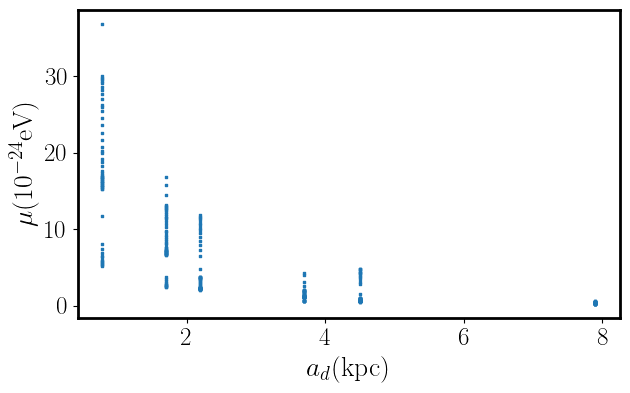

In [15]:
pts.scater(AD,MU,r'$a_d$(kpc)',r'$\mu(10^{-24}$eV)','')

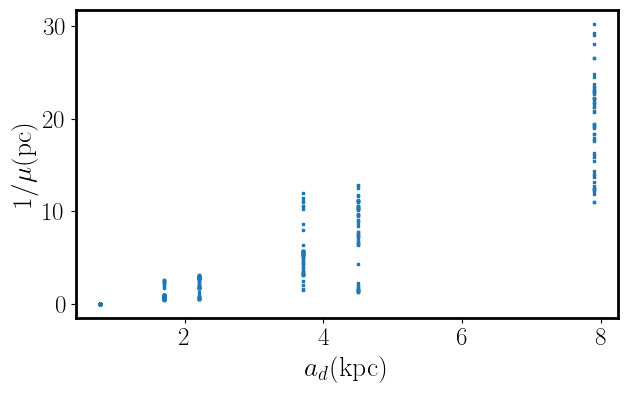

In [16]:
pts.scater(AD,MU2,r'$a_d$(kpc)',r'$1/\mu$(pc)','')